In [65]:
import numpy as np
from collections import OrderedDict
import matplotlib.pyplot as plt

### Sigmoid Class

In [66]:
class Sigmoid(object):
    def __init__(self) -> None:
        self.out = None
        super().__init__()
    
    def forward(self, x):
        self.out = 1 / (1 + np.exp(-x))
        return self.out
    
    def backward(self, dout):
        return dout * (1.0 - self.out) * self.out


In [67]:
class Affine(object):
    def __init__(self, W, b) -> None:
        self.W = W
        self.b = b
        self.x = None
        self.dW = None
        self.db = None
        super().__init__()        
        
    def forward(self, x):
        self.x = x
        
        return np.dot(self.x, self.W) + self.b

    def backward(self, dout):
        dx = np.dot(dout, self.W.T)
        self.dW = np.dot(self.x.T, dout)
        self.db = np.sum(dout, axis=0)
        return dx


In [68]:
class MSE(object):

    def __init__(self) -> None:
        self.loss = None
        self.y = None
        self.t = None
        
        super().__init__()
    
    def forward(self, x, t):
        self.t = t
        self.y = x
        self.loss = 1 / 2 * np.square(self.t - self.y).sum()
        
        return self.loss
    
    def backward(self, dout=1):
        batch_size = self.t.shape[0]
        return (self.y - self.t) / batch_size


In [69]:
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size) -> None:
        
        self.params = {}
        self.params['W1'] = np.random.uniform(size=(input_size, hidden_size))
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = np.random.uniform(size=(hidden_size, output_size))
        self.params['b2'] = np.zeros(output_size)
        
        self.layers = OrderedDict()
        self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
        self.layers['Sigmoid1'] = Sigmoid()
        self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])
        self.layers['Sigmoid2'] = Sigmoid()
        self.lastLayer = MSE()
            
        super().__init__()
    
    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)
            
        return x
    
    def loss(self, x, t):
        y = self.predict(x)
        return self.lastLayer.forward(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1) if t.ndim != 1 else t
        
        return np.sum(y == t) / float(x.shape[0])

    def gradient(self, x, t):
        
        self.loss(x, t)
        
        dout = 1
        dout = self.lastLayer.backward(dout)
        
        layers = list(self.layers.values())
        layers.reverse()
        
        for layer in layers:
            dout = layer.backward(dout)
            
        grads = {}
        grads['W1'], grads['b1'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W2'], grads['b2'] = self.layers['Affine2'].dW, self.layers['Affine2'].db
        
        return grads
        


In [70]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
t = np.array([[0], [1], [1], [0]])

network = TwoLayerNet(input_size=2, hidden_size=3, output_size=1)

epoch = 20000

learning_rate = 0.1

train_loss_list = []

In [72]:
for i in range(epoch):
    grad = network.gradient(X, t)
    
    for key in ('W1', 'b1', 'b1', 'W2'):
        network.params[key] -= learning_rate * grad[key]
        
    loss = network.loss(X, t)
    train_loss_list.append(loss)

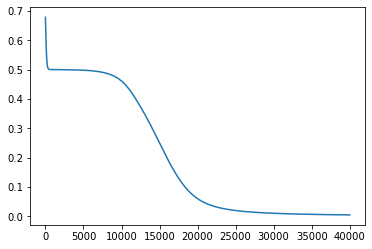

In [73]:
plt.plot(train_loss_list)